In [12]:
# !pip install bertopic datasets openai datamapplot

In [13]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Load data from Hugging Face
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

In [15]:
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [16]:
titles[0]

'Introduction to Arabic Speech Recognition Using CMUSphinx System'

1. Convert the input documents to embeddings with an embedding model.

2. Reduce the dimensionality of embeddings with a dimensionality reduction model.

3. Find groups of semantically similar documents with a cluster model.

# Embedding Documents


In [17]:
# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

# Reducing the Dimensionality of Embeddings


In [18]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(44949, 384)

In [19]:
# We reduce the input embeddings from 384 dimensions to 5 dimensions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)

In [20]:
reduced_embeddings = umap_model.fit_transform(embeddings)

In [21]:
reduced_embeddings.shape

(44949, 5)

# Cluster the Reduced Embeddings


In [22]:
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric="euclidean", cluster_selection_method="eom"
).fit(reduced_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [23]:
clusters = hdbscan_model.labels_

In [24]:
len(set(clusters))

152

In [25]:
np.unique(clusters)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150])

# Inspecting the Clusters


In [26]:
# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
    print(abstracts[index][:300] + "... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



# Visualizing in 2D

In [27]:
# Reduce 384-dimensional embeddings to two dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric="cosine", random_state=42
).fit_transform(embeddings)

In [28]:
# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

In [29]:
# Select outliers and non-outliers (clusters)
to_plot = df.loc[df.cluster != "-1", :]
outliers = df.loc[df.cluster == "-1", :]

In [30]:
to_plot

x          y                                              title  \
4      4.070374   8.596167  Segmentation and Context of Literary and Music...   
5      3.363642   9.767235  International Standard for a Linguistic Annota...   
6      3.274334   9.686829  A Formal Model of Dictionary Structure and Con...   
8      3.165826   8.386068  Learning Probabilistic Models of Word Sense Di...   
11    -2.836044   8.609470  Bio-linguistic transition and Baldwin effect i...   
...         ...        ...                                                ...   
44941 -2.211498  14.859519  Resolution of Indirect Anaphora in Japanese Se...   
44942  3.537383  12.145502  Pronoun Resolution in Japanese Sentences Using...   
44943  3.585454  11.973187  An Estimate of Referent of Noun Phrases in Jap...   
44944  3.568154  12.149991  Resolution of Verb Ellipsis in Japanese Senten...   
44947  3.395442  10.320541   HMM Specialization with Selective Lexicalization   

      cluster  
4          55  
5         112  
6         112  
8         117  
11         88  
...       ...  
44941       8  
44942       8  
44943       8  
44944       8  
44947     137  

[30896 rows x 4 columns]

(-7.0611567258834835,
 11.455457663536071,
 -0.9570045307278634,
 16.24694342762232)

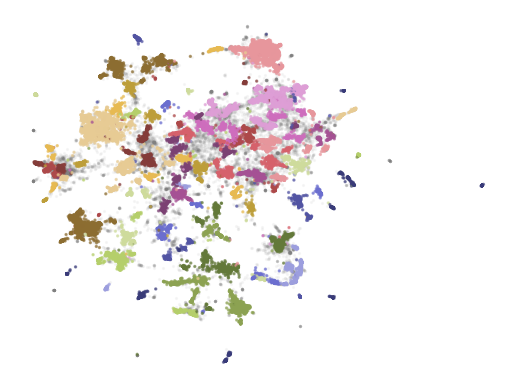

In [31]:
# Plot outliers and non-outliers separately
plt.scatter(outliers.x, outliers.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    to_plot.x, to_plot.y, c=to_plot.cluster.astype(int),
    alpha=0.6, s=2, cmap="tab20b"
)
plt.axis("off")

# BERTopic: From Text Clustering to Topic Modeling

In this section, we will extend text clustering into the realm of topic modeling through a highly modular text clustering and topic modeling framework, namely BERTopic.

**BERTopic**
https://maartengr.github.io/BERTopic/

Part 1:
- embed documents
- reduce their dimensionality
- cluster the reduced embedding to create groups of semantically similar documents

Part 2:
- models a distribution over words in the corpus’s vocabulary by leveraging a classic method, namely bag-of-words. The frequency of words is calculated within the entire cluster instead of only the document

BERTopic uses a class-based variant of term frequency–inverse document frequency (c-TF-IDF) to put more weight on words that are more meaningful to a cluster and put less weight on words that are used across all clusters.
- the IDF value is calculated by taking the logarithm of the average frequency of all words across all clusters divided by the total frequency of each word.

We will:
- generate the bag-of-words (or term frequency) representation. Each cluster is considered a topic that has a specific ranking of the corpus’s vocabulary

To sum up:
- TF-IDF:
    - TF: will be the count vectorizer applied to the bag of words within each topic (cluster)
    - IDF: will be the weight associated to each word based on the logged ratio between the average frequency of all words in the vocabulary (A) and the total frequency of each word in all the clusters (cf_x).
- **The final pipeline is**:
    - Clustering:
        - Sentence Bert to generate embeddings
        - UMAP: to reduce dimensionality
        - HDBSCAN: to create dense clusters
    - Topic representation:
        - CountVectorizer
        - c-TF-IDF

In [32]:
from bertopic import BERTopic

In [33]:
# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2024-12-09 11:57:41,119 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-09 11:57:56,701 - BERTopic - Dimensionality - Completed ✓
2024-12-09 11:57:56,702 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-09 11:57:57,159 - BERTopic - Cluster - Completed ✓
2024-12-09 11:57:57,163 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-09 11:57:58,687 - BERTopic - Representation - Completed ✓


In [34]:
topic_model.get_topic_info()

Topic  Count                                          Name  \
0       -1  14053                              -1_of_the_and_to   
1        0   2249                0_question_answer_qa_questions   
2        1   2047                  1_speech_asr_recognition_end   
3        2   1375         2_medical_clinical_biomedical_patient   
4        3    963                3_translation_nmt_machine_bleu   
..     ...    ...                                           ...   
147    146     52               146_mixed_code_sentiment_mixing   
148    147     52          147_counseling_mental_therapy_health   
149    148     51  148_diffusion_generation_autoregressive_text   
150    149     51                149_long_context_window_length   
151    150     50   150_opinion_reviews_summaries_summarization   

                                        Representation  \
0    [of, the, and, to, in, we, language, for, that...   
1    [question, answer, qa, questions, answering, a...   
2    [speech, asr, recognition, end, acoustic, spea...   
3    [medical, clinical, biomedical, patient, notes...   
4    [translation, nmt, machine, bleu, neural, engl...   
..                                                 ...   
147  [mixed, code, sentiment, mixing, english, anal...   
148  [counseling, mental, therapy, health, psychoth...   
149  [diffusion, generation, autoregressive, text, ...   
150  [long, context, window, length, llms, memory, ...   
151  [opinion, reviews, summaries, summarization, r...   

                                   Representative_Docs  
0    [  Our research focuses on solving the zero-sh...  
1    [  Question generation (QG) attempts to solve ...  
2    [  End-to-end Speech Translation (ST) models h...  
3    [  Biomedical Named Entity Recognition (NER) i...  
4    [  Neural Machine Translation (NMT) models ach...  
..                                                 ...  
147  [  In today's interconnected and multilingual ...  
148  [  High-quality psychological counseling is cr...  
149  [  Diffusion models have achieved great succes...  
150  [  Extending the context window of large langu...  
151  [  When faced with a large number of product r...  

[152 rows x 5 columns]

In [35]:
topic_model.get_topic(0)

[('question', 0.021065559562595707),
 ('answer', 0.015825453280722542),
 ('qa', 0.015797835568360098),
 ('questions', 0.01571027962197736),
 ('answering', 0.014663116289469163),
 ('answers', 0.009926713640397202),
 ('retrieval', 0.009401115217965083),
 ('comprehension', 0.007643307651448418),
 ('reading', 0.007076770506113751),
 ('the', 0.006314183820708588)]

In [36]:
topic_model.find_topics("topic modeling")

([28, -1, 27, 2, 115],
 [0.95527726, 0.9115172, 0.9085627, 0.90707725, 0.905268])

In [37]:
topic_model.get_topic(28)

[('topic', 0.06977873496445273),
 ('topics', 0.03754909922670839),
 ('lda', 0.017178772404117592),
 ('latent', 0.013737588795940016),
 ('document', 0.012701595461891983),
 ('modeling', 0.012475887725216721),
 ('documents', 0.012334567122799886),
 ('dirichlet', 0.010367050726666726),
 ('word', 0.008994278565275706),
 ('allocation', 0.00807607474431214)]

In [38]:
topic_model.topics_[titles.index("BERTopic: Neural topic modeling with a class-based TF-IDF procedure")]

28

In [39]:
titles.index("BERTopic: Neural topic modeling with a class-based TF-IDF procedure")

25033

In [40]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles, 
    reduced_embeddings=reduced_embeddings, 
    width=1200, 
    hide_annotations=True
)

In [41]:
# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [42]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

In [43]:
# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

In [44]:
# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

# Re-Ranker

We can rerank the initial distribution of words to improve the resulting representation

- In BERTopic, such reranker models are referred to as representation models. 

<img src="imgs/bertopic_legos.png" alt="Alt text" width="500" height="300">

In [45]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [46]:
original_topics

{-1: [('of', 0.006087417724333093),
  ('the', 0.006069603259284771),
  ('and', 0.006015675072437314),
  ('to', 0.005863988746460902),
  ('in', 0.005728568187990946),
  ('we', 0.005562350964201791),
  ('language', 0.005389748755920454),
  ('for', 0.005323571620362989),
  ('that', 0.005297429145326541),
  ('on', 0.005138639960460233)],
 0: [('question', 0.021065559562595707),
  ('answer', 0.015825453280722542),
  ('qa', 0.015797835568360098),
  ('questions', 0.01571027962197736),
  ('answering', 0.014663116289469163),
  ('answers', 0.009926713640397202),
  ('retrieval', 0.009401115217965083),
  ('comprehension', 0.007643307651448418),
  ('reading', 0.007076770506113751),
  ('the', 0.006314183820708588)],
 1: [('speech', 0.028847660014014558),
  ('asr', 0.019696966963532344),
  ('recognition', 0.013892042339152828),
  ('end', 0.010631539299950244),
  ('acoustic', 0.009868785218921138),
  ('speaker', 0.007068561943835958),
  ('wer', 0.006697276515500057),
  ('error', 0.006643908981893124),

In [47]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]
    
    return df

### KeyBERTInspired

KeyBERTInspired is, as you might have guessed, a method inspired by the keyword extraction package, KeyBERT.

KeyBERT extracts keywords from texts by comparing word and document embeddings through cosine similarity.

![KeyBertInspired](imgs/KeyBertInspired.png)

In [48]:
from bertopic.representation import KeyBERTInspired


In [49]:
# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()

In [50]:
topic_model.update_topics(abstracts, representation_model=representation_model)

In [51]:
topic_model

In [52]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | answer | qa | questions | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | notes   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  answering | questions | comprehension | questi...  
1  speech | phonetic | transcription | voice | la...  
2           nlp | ehr | ehrs | clinical | biomedical  
3  translation | translate | translations | multi...  
4  summarization | summarizers | summaries | summ...

### Removing redundancy in topics: Maximal marginal relevance

We can use maximal marginal relevance (MMR) to diversify our topic representations. The algorithm attempts to find a set of keywords that are diverse from one another but still relate to the documents they are compared to. 

It works by embedding a set of candidate keywords and iteratively calculating the next best keyword to add. Doing so requires setting a diversity parameter, which indicates how diverse keywords need to be.


In [53]:
from bertopic.representation import MaximalMarginalRelevance


In [54]:
# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.2)
topic_model.update_topics(abstracts, representation_model=representation_model)


In [55]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | answer | qa | questions | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | notes   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  questions | retrieval | comprehension | hop | ...  
1              speech | asr | wer | audio | training  
2  medical | clinical | biomedical | patient | pa...  
3       translation | nmt | bleu | neural | parallel  
4  summarization | summaries | extractive | sente...

# Generative Models as the Last Block in BERTopic

We will use the model to generate a label for our topic

![Generative BERTopic](imgs/generative_bertopic.png)

- the [DOCUMENTS] tag are a small subset of documents, typically four, that best represent the topic: documents with the highest cosine similarity of their c-TF-IDF values with those of the topic are selected
- keywords that make up a topic are also passed to the prompt and referenced using the [KEYWORDS]. The keywords could be generated by c-TF-IDF or any of the other representations we discussed thus far.

In [56]:
from transformers import pipeline
from bertopic.representation import TextGeneration

In [57]:
prompt = """I have a topic that contains the following documents: 
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is this topic about?"""

In [58]:
# Update our topic representations using Flan-T5
generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)
topic_model.update_topics(abstracts, representation_model=representation_model)

100%|██████████| 152/152 [00:26<00:00,  5.80it/s]


In [59]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | answer | qa | questions | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | notes   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                  Updated  
0          Question answering |  |  |  |   
1          Speech recognition |  |  |  |   
2                Science/Tech |  |  |  |   
3  Neural machine translation |  |  |  |   
4               Summarization |  |  |  |

In [60]:
# !pip install python-dotenv

In [61]:
# !pip install openai==1.42.0
# !pip install httpx==0.27.2

In [62]:
from dotenv import load_dotenv
import os

In [63]:
load_dotenv()
# os.environ["OPENAI_API_KEY"]

True

In [64]:
import openai
from bertopic.representation import OpenAI

In [65]:
prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: [KEYWORDS]

Based on the information above, extract a short topic label in the following format:
topic: <short topic label>
"""

In [66]:
# Update our topic representations using GPT-4o
openai.api_key = os.environ.get("OPENAI_API_KEY")
client = openai.OpenAI()

In [67]:
representation_model = OpenAI(
    client, model="gpt-4o-mini", exponential_backoff=True, chat=True, prompt=prompt
)

In [68]:
topic_model.update_topics(abstracts, representation_model=representation_model)

100%|██████████| 152/152 [01:16<00:00,  1.99it/s]


In [69]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | answer | qa | questions | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | notes   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0       Question Answering and Generation Techniques  
1      Speech Recognition and Translation Techniques  
2  Medical Concept Representation and Extraction ...  
3  Neural Machine Translation and Domain Adaptati...  
4           Text Summarization Techniques and Models

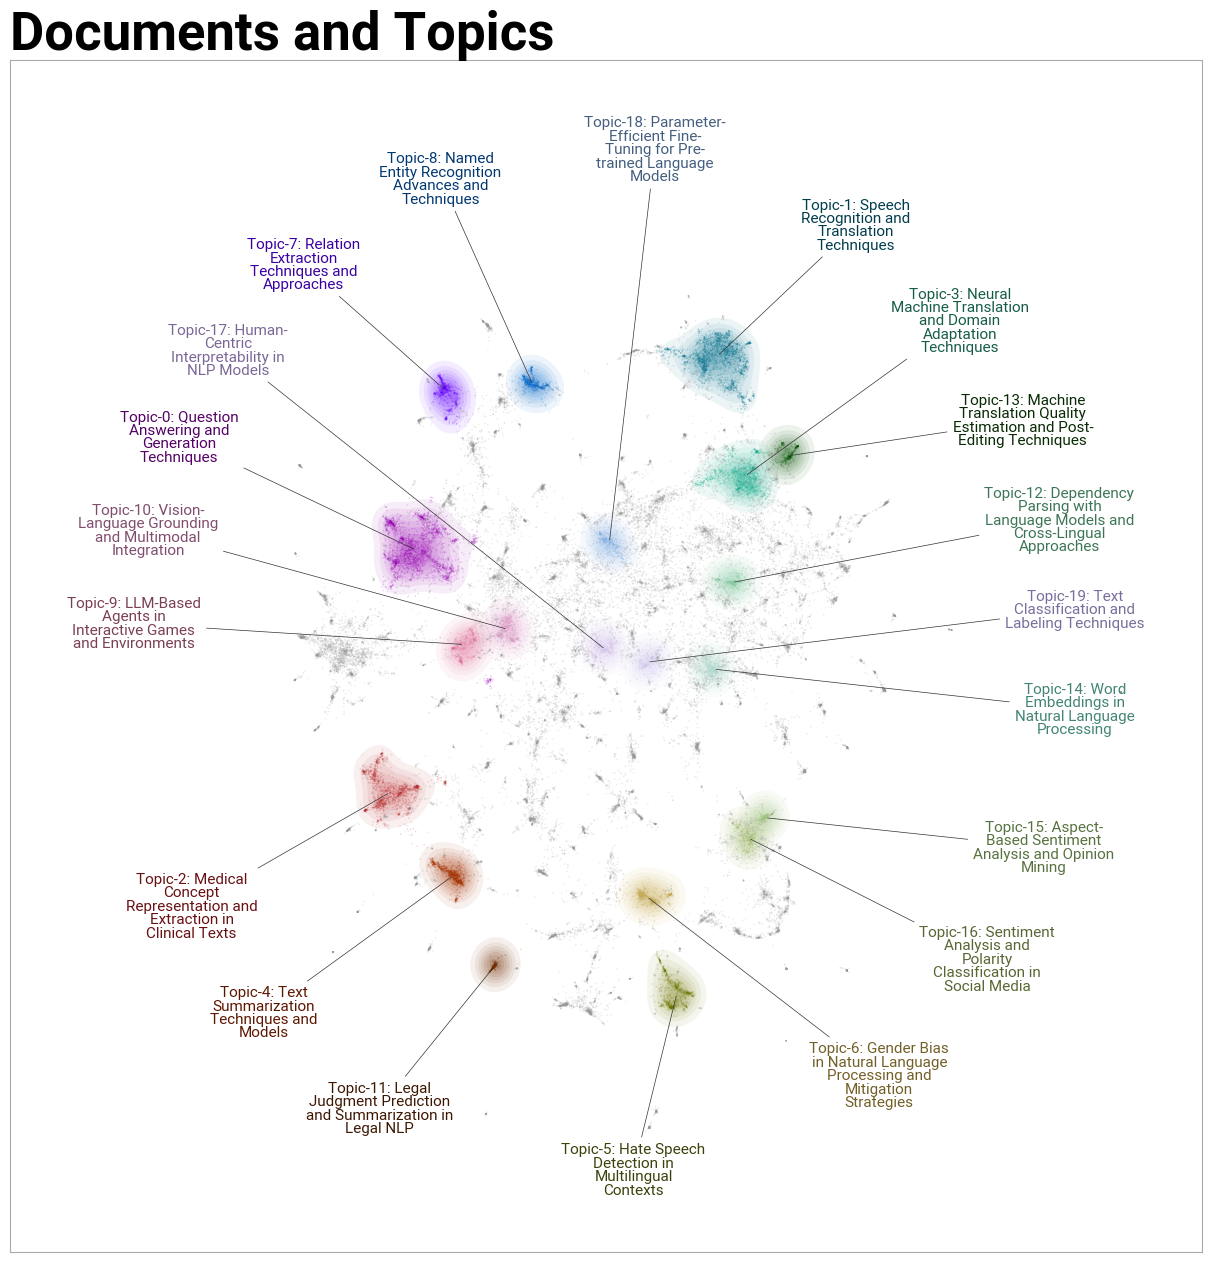

In [70]:
# Visualize topics and documents
fig = topic_model.visualize_document_datamap(
    titles,
    topics=list(range(20)),
    reduced_embeddings=reduced_embeddings,
    width=1200,
    label_font_size=11,
    label_wrap_width=20,
    use_medoids=True,
)